In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

%matplotlib inline

In [39]:
df= pd.read_csv("data/kc_house_data.csv")

In [40]:
df['view'] = df['view'].fillna(value="NONE")
df['waterfront'] = df['waterfront'].fillna(value="N/A")
df['yr_renovated'] = df['yr_renovated'].fillna(value= 0.0)
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: x.replace("?", "0.0"))
df['sqft_basement'] = df['sqft_basement'].astype("float64")
df['grade'] = df["grade"].str.split(" ").str[0].astype('int64')

In [41]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,N/A,NONE,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


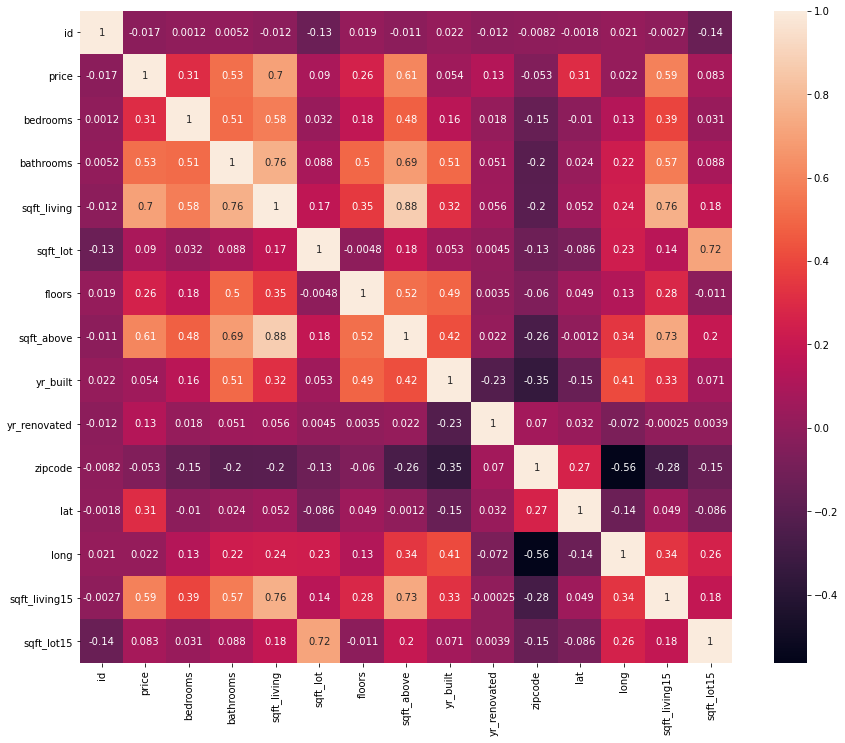

In [7]:
plt.figure(figsize = (15, 12))
sns.heatmap(df.corr(), annot = True, square = True);

## Multiple 

In [8]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_living15']]
y = df['price'] 

simple_model= sm.OLS(endog=y, exog= sm.add_constant(X)).fit()
model_summary = simple_model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     3823.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        11:47:30   Log-Likelihood:            -2.9957e+05
No. Observations:               21597   AIC:                         5.992e+05
Df Residuals:                   21590   BIC:                         5.992e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1776.5367   8592.660      0.207      0.836   -1.51e+04    1.86e+04
bedrooms      -5.614e+04   2347.865    -23.912      0.000   -6.07e+04   -5.15e+04
bathrooms      1992.8239   3830.305      0.520      0.603   -5514.858    9500.506
sqft_living     313.1411      5.150     60.803      0.000     303.046     323.236
floors         2.319e+04   4299.295      5.394      0.000    1.48e+04    3.16e+04
sqft_above      -57.8059      5.154    -11.217      0.000     -67.907     -47.704
sqft_living15    70.9693      4.011     17.695      0.000      63.108      78.831
==============================================================================
Omnibus:                    15261.948   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           638288.486
Skew:                           2.908   Prob(JB):                         0.00
Kurtosis:                      28.990   Cond. No.                     1.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Condition

In [9]:
df['condition']

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object

In [10]:
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [11]:
one_hot = pd.get_dummies(df["condition"],
                         prefix="condition",
                         drop_first=False)
one_hot

,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
21592,1,0,0,0,0
21593,1,0,0,0,0
21594,1,0,0,0,0
21595,1,0,0,0,0


In [12]:
one_hot_df = pd.get_dummies(df, prefix="condition", 
                            columns=["condition"], 
                            drop_first=False)
one_hot_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,98178,47.5112,-122.257,1340,5650,1,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,1,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,98028,47.7379,-122.233,2720,8062,1,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,98136,47.5208,-122.393,1360,5000,0,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,98074,47.6168,-122.045,1800,7503,1,0,0,0,0


In [13]:
one_hot.value_counts()

condition_Average  condition_Fair  condition_Good  condition_Poor  condition_Very Good
1                  0               0               0               0                      14020
0                  0               1               0               0                       5677
                                   0               0               1                       1701
                   1               0               0               0                        170
                   0               0               1               0                         29
dtype: int64

## Grade

In [14]:
df["grade"].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [16]:
df["grade_int"] = df["grade"].str.split(" ").str[0].astype('int64')
df["grade_int"]

0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: grade_int, Length: 21597, dtype: int64

In [18]:
df['grade_int'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade_int, dtype: int64

In [19]:
endog = df["price"]
exog = sm.add_constant(df["grade_int"])
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        11:48:49   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade_int   2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## New multiple

In [20]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_living15', 'grade_int']]
y = df['price'] 

simple_model= sm.OLS(endog=y, exog= sm.add_constant(X)).fit()
model_summary = simple_model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     3786.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        11:48:53   Log-Likelihood:            -2.9874e+05
No. Observations:               21597   AIC:                         5.975e+05
Df Residuals:                   21589   BIC:                         5.976e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.271e+05   1.52e+04    -34.741      0.000   -5.57e+05   -4.97e+05
bedrooms      -4.091e+04   2288.755    -17.873      0.000   -4.54e+04   -3.64e+04
bathrooms     -2.188e+04   3730.174     -5.866      0.000   -2.92e+04   -1.46e+04
sqft_living     268.5806      5.070     52.972      0.000     258.642     278.519
floors        -7387.7867   4201.864     -1.758      0.079   -1.56e+04     848.176
sqft_above      -78.8556      4.985    -15.819      0.000     -88.626     -69.085
sqft_living15    20.1767      4.048      4.984      0.000      12.242      28.111
grade_int      1.051e+05   2528.389     41.573      0.000       1e+05     1.1e+05
==============================================================================
Omnibus:                    16742.966   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           990442.775
Skew:                           3.236   Prob(JB):                         0.00
Kurtosis:                      35.539   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Sqft Living

In [21]:
endog = df["price"]
exog = sm.add_constant(df["sqft_living"])
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        11:48:55   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bedrooms

In [22]:
endog = df["price"]
exog = sm.add_constant(df["bedrooms"])
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        11:48:59   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Bathrooms

In [23]:
endog = df["price"]
exog = sm.add_constant(df["bathrooms"])
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        11:49:32   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Floors

In [24]:
endog = df["price"]
exog = sm.add_constant(df["floors"])
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1525.
Date:                Mon, 09 May 2022   Prob (F-statistic):          2.57e-322
Time:                        11:50:26   Log-Likelihood:            -3.0665e+05
No. Observations:               21597   AIC:                         6.133e+05
Df Residuals:                   21595   BIC:                         6.133e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.791e+05   7111.797     39.247      0.000    2.65e+05    2.93e+05
floors      1.748e+05   4476.843     39.047      0.000    1.66e+05    1.84e+05
==============================================================================
Omnibus:                    19356.966   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1255747.571
Skew:                           4.076   Prob(JB):                         0.00
Kurtosis:                      39.456   Cond. No.                         6.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

y = df['price'] # dependent variable
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_living15', 'grade_int']]

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

[18.0708341740851, 24.84959049200443, 44.623862704122956, 15.768225210754833, 33.07245376205158, 25.77790619884985, 40.60658724145536]


In [31]:
df_corrs = df.corr()['price'].map(abs).sort_values(ascending=False)
df_corrs

price            1.000000
sqft_living      0.701917
grade_int        0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

In [33]:
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
grade_int        0.667951
Name: price, dtype: float64